# Churchland Widefield Data

This notebook demonstrates:
- Decoding L/R choice from different periods of the delay period

Run this with access to the engram

In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from LearningSession import *
from LearningChoicePredictor import *

# Single Session

## 0. Specify the mouse and session date you are looking at

In [2]:
mouse = "mSM63"
days = os.listdir("/home/chingf/engram/data/musall/learning/neural/mSM63")
days = [d for d in days if "2018" in d]
days.sort(key = lambda date: datetime.strptime(date, '%d-%b-%Y')) 

## 1. Load data for decoding with all regions

In [3]:
results = pickle.load(
    open("pickles/choicedecoding_learning_mSM63.p", "rb")
    )

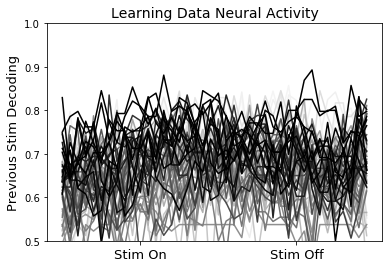

In [4]:
# Plots choice decoding, colored by time
import matplotlib.pylab as pl
plt.figure()
dates_of_interest = days[:-10]
colors = pl.cm.Greys(np.linspace(-0.1,1.1,len(dates_of_interest)))
for idx, date in enumerate(dates_of_interest):
    result = results[idx]
    if result['models'][0] is None:
        continue
    num_test_trials = result['test_indices'][0].size
    min_num_trials = 200 # Test and train trials
    if num_test_trials < min_num_trials*0.2:
        continue
    plt.plot(result['scores'], color=colors[idx])
plt.ylim((0.5,1.0))
plt.title("Learning Data Neural Activity", fontsize=14)
plt.ylabel("Previous Stim Decoding", fontsize=13)
plt.xticks(
    [10,30],
    ['Stim On', 'Stim Off'],
    fontsize=13
    )
plt.show()

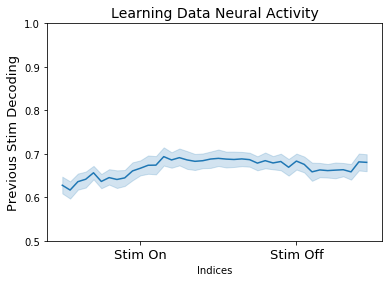

In [21]:
# Plots choice decoding averaged
plt.figure()
indices = []
scores = []
dates_of_interest = days[:-10]
for idx, date in enumerate(dates_of_interest):
    result = results[idx]
    if result['models'][0] is None:
        continue
    num_test_trials = result['test_indices'][0].size
    min_num_trials = 200 # Test and train trials
    if num_test_trials < min_num_trials*0.2:
        continue
    for s_idx, score in enumerate(result['scores']):
        indices.append(s_idx)
        scores.append(score)
df = pd.DataFrame({
    "Indices": indices, "Scores": scores
    })
sns.lineplot(x="Indices", y="Scores", data=df)
plt.ylim((0.5,1.0))
plt.title("Learning Data Neural Activity", fontsize=14)
plt.ylabel("Previous Stim Decoding", fontsize=13)
plt.xticks(
    [10,30],
    ['Stim On', 'Stim Off'],
    fontsize=13
    )
plt.show()

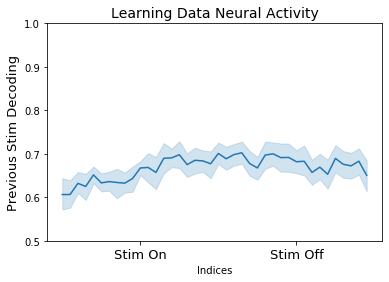

In [5]:
# Plots choice decoding averaged: Auditory only
plt.figure()
indices = []
scores = []
dates_of_interest = days[:-10]
for idx, date in enumerate(dates_of_interest[:31]):
    result = results[idx]
    if result['models'][0] is None:
        continue
    num_test_trials = result['test_indices'][0].size
    min_num_trials = 200 # Test and train trials
    if num_test_trials < min_num_trials*0.2:
        continue
    for s_idx, score in enumerate(result['scores']):
        indices.append(s_idx)
        scores.append(score)
df = pd.DataFrame({
    "Indices": indices, "Scores": scores
    })
sns.lineplot(x="Indices", y="Scores", data=df)
plt.ylim((0.5,1.0))
plt.title("Learning Data Neural Activity", fontsize=14)
plt.ylabel("Previous Stim Decoding", fontsize=13)
plt.xticks(
    [10,30],
    ['Stim On', 'Stim Off'],
    fontsize=13
    )
plt.show()

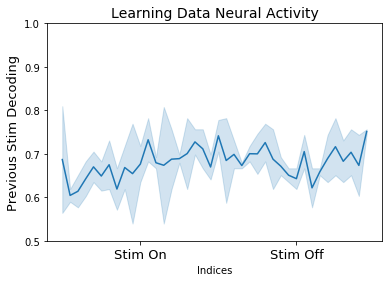

In [6]:
# Plots choice decoding averaged: AudTac
plt.figure()
indices = []
scores = []
dates_of_interest = days[:-10]
for idx, date in enumerate(dates_of_interest[31:41]):
    result = results[idx]
    if result['models'][0] is None:
        continue
    num_test_trials = result['test_indices'][0].size
    min_num_trials = 200 # Test and train trials
    if num_test_trials < min_num_trials*0.2:
        continue
    for s_idx, score in enumerate(result['scores']):
        indices.append(s_idx)
        scores.append(score)
df = pd.DataFrame({
    "Indices": indices, "Scores": scores
    })
sns.lineplot(x="Indices", y="Scores", data=df)
plt.ylim((0.5,1.0))
plt.title("Learning Data Neural Activity", fontsize=14)
plt.ylabel("Previous Stim Decoding", fontsize=13)
plt.xticks(
    [10,30],
    ['Stim On', 'Stim Off'],
    fontsize=13
    )
plt.show()

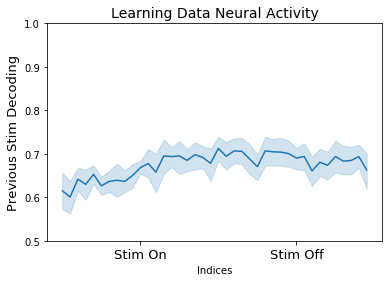

In [7]:
# Plots choice decoding averaged: TacAud
plt.figure()
indices = []
scores = []
dates_of_interest = days[:-10]
for idx, date in enumerate(dates_of_interest[41:68]):
    result = results[idx]
    if result['models'][0] is None:
        continue
    num_test_trials = result['test_indices'][0].size
    min_num_trials = 200 # Test and train trials
    if num_test_trials < min_num_trials*0.2:
        continue
    for s_idx, score in enumerate(result['scores']):
        indices.append(s_idx)
        scores.append(score)
df = pd.DataFrame({
    "Indices": indices, "Scores": scores
    })
sns.lineplot(x="Indices", y="Scores", data=df)
plt.ylim((0.5,1.0))
plt.title("Learning Data Neural Activity", fontsize=14)
plt.ylabel("Previous Stim Decoding", fontsize=13)
plt.xticks(
    [10,30],
    ['Stim On', 'Stim Off'],
    fontsize=13
    )
plt.show()

## 2. Load data for LOO decoding

In [8]:
loo_results = pickle.load(
    open("pickles/choicedecodingloo_learning_mSM63.p", "rb")
    )

In [9]:
def plot_region_loo(frame_indices, title, day_range=None):
    if day_range is None:
        day_range = range(len(loo_results))
    region_loo_scores = [] # Will store difference in predictive power
    regions = []
    for day_idx in day_range:
        loo_result = loo_results[day_idx]
        all_result = results[day_idx]
        for region in loo_result.keys():
            region_result = loo_result[region]
            for frame_idx in frame_indices:
                all_result_score = all_result['scores'][frame_idx]
                region_score = region_result['scores'][frame_idx]
                region_loo_scores.append(
                    region_score - all_result_score
                    )
                regions.append(region)
    df = pd.DataFrame({
        "regions": regions, "scores": region_loo_scores
        })
    plt.figure(figsize=(10,6))
    sns.barplot(x="regions", y="scores", data=df)
    plt.title(title)
    plt.ylabel("Change in Predictive Accuracy")
    plt.xlabel("Region")
    plt.show()

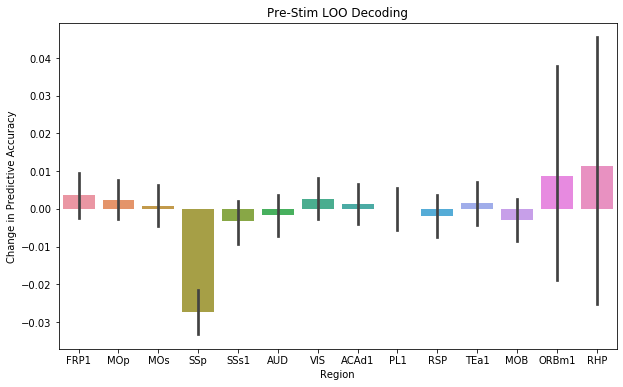

In [10]:
plot_region_loo(np.arange(9), "Pre-Stim LOO Decoding")

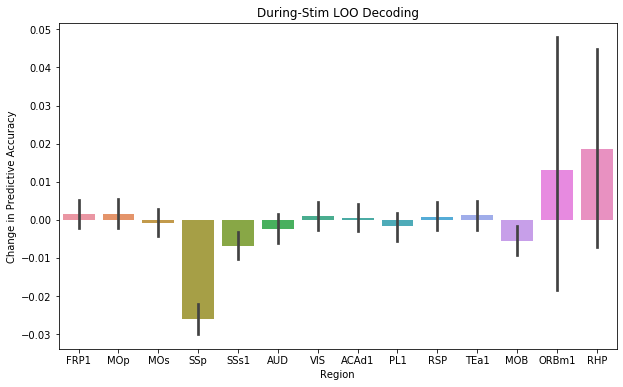

In [11]:
plot_region_loo(np.arange(11,30), "During-Stim LOO Decoding")

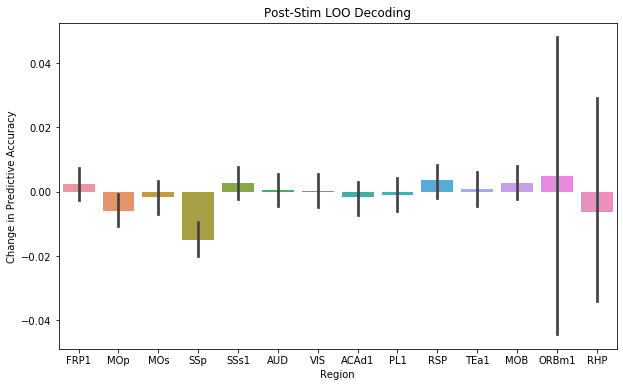

In [12]:
plot_region_loo(np.arange(31,40), "Post-Stim LOO Decoding")

## 3. Load data for LOI decoding

In [13]:
loo_results = pickle.load(
    open("pickles/choicedecodingloi_learning_mSM63.p", "rb")
    )

In [23]:
def plot_region_loi(frame_indices, title, day_range=None):
    if day_range is None:
        day_range = range(len(loo_results))
    region_loo_scores = [] # Will store difference in predictive power
    regions = []
    for day_idx in day_range:
        loo_result = loo_results[day_idx]
        all_result = results[day_idx]
        for region in loo_result.keys():
            region_result = loo_result[region]
            for frame_idx in frame_indices:
                region_score = region_result['scores'][frame_idx]
                region_loo_scores.append(region_score)
                regions.append(region)
    df = pd.DataFrame({
        "regions": regions, "scores": region_loo_scores
        })
    plt.figure(figsize=(10,6))
    sns.barplot(x="regions", y="scores", data=df)
    plt.title(title)
    plt.ylabel("Change in Predictive Accuracy")
    plt.xlabel("Region")
    plt.axhline(0.5, color="black")
    plt.ylim((0.47, 0.7))
    plt.show()

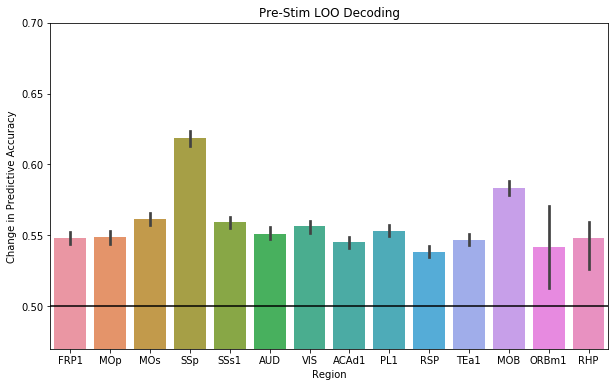

In [24]:
plot_region_loi(np.arange(9), "Pre-Stim LOO Decoding")

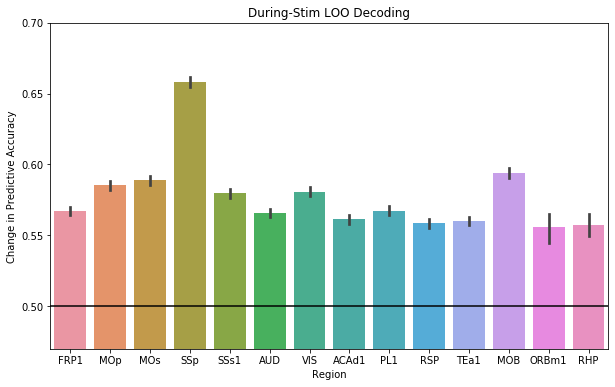

In [25]:
plot_region_loi(np.arange(11,30), "During-Stim LOO Decoding")

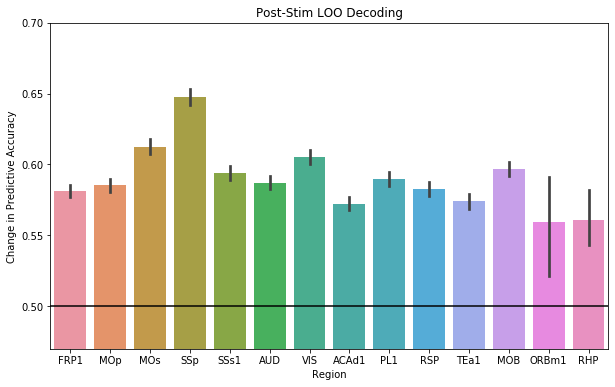

In [27]:
plot_region_loi(np.arange(31,40), "Post-Stim LOO Decoding")

## Zeroing in on certain tasks

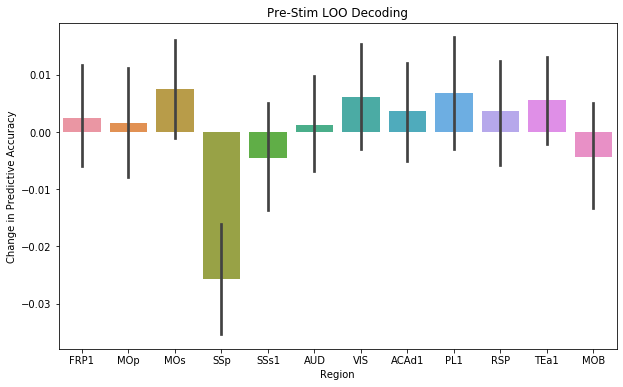

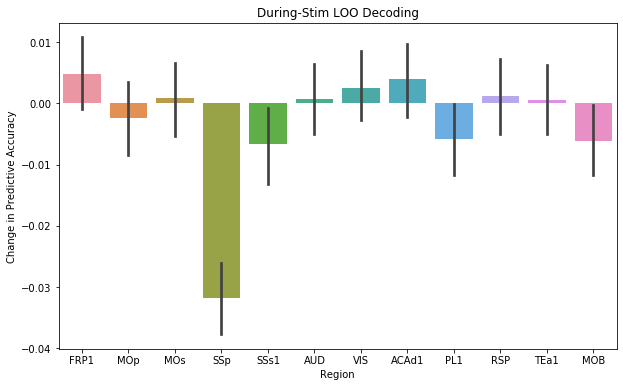

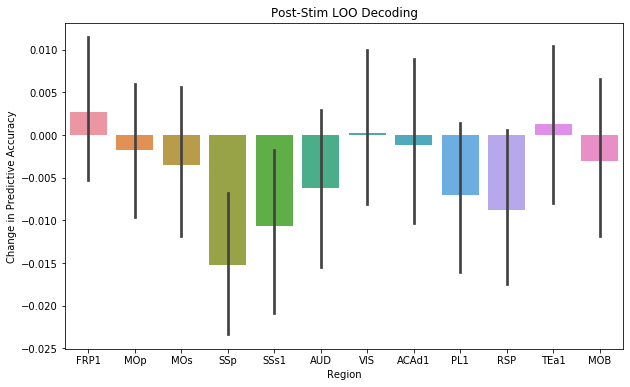

In [76]:
dr = np.arange(41,67)
plot_region_loo(
    np.arange(9), "Pre-Stim LOO Decoding", day_range=dr)

plot_region_loo(
    np.arange(11,30), "During-Stim LOO Decoding", day_range=dr)

plot_region_loo(
    np.arange(31,40), "Post-Stim LOO Decoding", day_range=dr)